# 5a. Redukcja wymiarowości danych

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, fetch_openml
from sklearn.decomposition import PCA

In [17]:
data = fetch_california_housing(as_frame=True)['data']

## Zadania

1. Przygotować funkcję, która na podstawie algorytmu PCA wyznaczy minimalną liczbę głównych składowych objaśniających przekazany w parametrze współczynnik wariancji.

In [47]:
def find_n_components(data, s=0.95):
    pca = PCA(n_components=s)
    pca.fit_transform(data)
    return pca.n_components_

find_n_components(data=data, s=0.99999)


4

In [50]:
# rozwiązanie kolegi z grupy ale dla mnie niejasne i daje dziwne wyniki
def min_components(data, var_tresh=.95):
    pca = PCA(n_components=var_tresh)
    pca.fit_transform(data)
    variance = np.cumsum(pca.explained_variance_ratio_)
    print(variance)
    return np.argmax(variance >= var_tresh)

print(min_components(data=data, var_tresh=.99999))

[0.99978933 0.99990261 0.99998589 0.99999233]
3


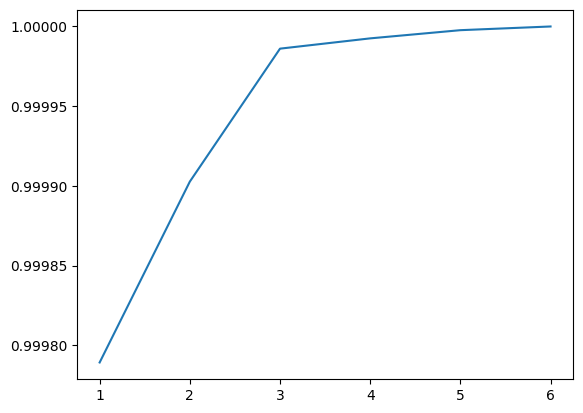

In [38]:
components = np.arange(1, data.shape[1] - 1)
variance = []

for i in components:
    pca = PCA(n_components=i)
    pca.fit_transform(data)
    variance.append(np.cumsum(pca.explained_variance_ratio_)[-1])

plt.plot(components, variance)


2. Przygotować klasę Compressor, która przyjmie w inicjalizatorze zbiór danych w postaci ramki oraz oczekiwany współczynnik wariancji wyjaśnionej i będzie posiadała następujące metody:
   1. compress: zredukuje rozmiar danych i usunie oryginalną ramkę
   2. inverse: przywróci dane do pierwotnego rozmiaru 
   3. Przy implementacji wykorzystać metodę PCA    

In [27]:
class Compressor:
    
    def __init__(self,n_components, data) -> None:
        self.n_components = n_components
        self.data = data
        self.pca = PCA(self.n_components)

    def compress(self):       
        data_compressed = self.pca.fit_transform(self.data)
        return data_compressed

    def inverse(self, data_compressed):
        data_inversed = self.pca.inverse_transform(data_compressed)
        return data_inversed

In [52]:
c1 = Compressor(0.9999, data=data)
data.shape

(20640, 8)

In [53]:
compressed_data = c1.compress()
compressed_data.shape

(20640, 2)

In [30]:
inverse_data = c1.inverse(compressed_data)
inverse_data.shape

(20640, 8)

3. Przygotować potok dla zbioru danych *califormia_housing*, który wyznaczy najbardziej optymalną liczbe głównych składowych dla zadania regresji przeprowadzonego za pomocą algorytmu regresji liniowej.
4. Porównać wynik uzyskany w zadaniu 3. za pomocą metody "łokcia" reprezentującego najbardziej optymalną liczbę głównych składowych.

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_california_housing

In [88]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [89]:
pca = PCA(n_components=0.99999)
data_reduced = pca.fit_transform(data)
data_reduced.shape
pca.n_components_

4

In [90]:
# Wczytanie danych i podział na cechy i target
ca_housing_data = fetch_california_housing()
X = ca_housing_data.data
y = ca_housing_data.target
X.shape

(20640, 8)

In [106]:
# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [123]:
# funkcja do znajdowania najlepsnajlepszej liczby komponentow
def find_bect_components_nb(input_data):
    X = input_data.data
    y = input_data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Iterate through different numbers of principal components
    best_mse = float('inf')
    best_n_components = None
    for n_component in range(1, data.shape[1] + 1):
        # Define pipeline with PCA
        ca_housing_pipe = Pipeline([
        ('scaler', MinMaxScaler(feature_range=(0,1))),
        ('pca', PCA(n_components=n_component)),
        ('regressor', LinearRegression())
    ])

        # Fit the pipeline with PCA
        ca_housing_pipe.fit(X_train, y_train)

        # Evaluate the model with PCA on the test set
        y_pred_with_pca = ca_housing_pipe.predict(X_test)
        mse_with_pca = np.mean((y_test - y_pred_with_pca)**2)
        print(f'mse_with_pca: {mse_with_pca}')
        print(f'best_mse: {best_mse}')

        # Update the best MSE (Mean squared error) and best number of components if necessary
        if mse_with_pca < best_mse:
            best_mse = mse_with_pca
            best_n_components = n_component

    # Display the best number of principal components and corresponding MSE
    print("Best number of principal components:", best_n_components)
    print("Mean squared error with the best number of components:", best_mse)
    
print(find_bect_components_nb(ca_housing_data))

mse_with_pca: 1.3058954401350902
best_mse: inf
mse_with_pca: 1.2924753111096619
best_mse: 1.3058954401350902
mse_with_pca: 0.6295323474890342
best_mse: 1.2924753111096619
mse_with_pca: 0.5513150840302492
best_mse: 0.6295323474890342
mse_with_pca: 0.5504490289949073
best_mse: 0.5513150840302492
mse_with_pca: 0.5493641091555412
best_mse: 0.5504490289949073
mse_with_pca: 0.5482556206190308
best_mse: 0.5493641091555412
mse_with_pca: 0.555891598695244
best_mse: 0.5482556206190308
Best number of principal components: 7
Mean squared error with the best number of components: 0.5482556206190308
None


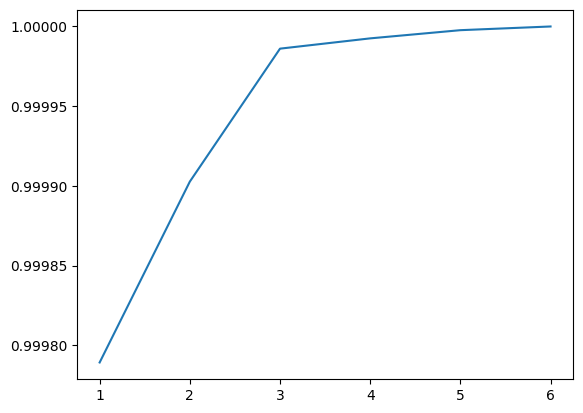

In [95]:
components = np.arange(1, X.shape[1] - 1)
variance = []

for i in components:
    pca = PCA(n_components=i)
    pca.fit_transform(data)
    variance.append(np.cumsum(pca.explained_variance_ratio_)[-1])

plt.plot(components, variance)